## 인공신경망(다층퍼셉트론)을 이용한 보스턴 주택가격 예측
* 데이터 입력

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("재현을 위한 시드 고정:", SEED)

X_df, y_df = datasets.fetch_openml('boston', return_X_y=True)
X_df = X_df.astype(float)    # CHAS, RAD 속성을 범주형에서 수치형(float)으로 변경
y_df = y_df.to_frame()       # Pandas Series 타입을 Pandas DataFrame 타입으로 변경
print("x데이터 형태:", X_df.shape)
print("y데이터 형태:", y_df.shape)

재현을 위한 시드 고정: 12


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


x데이터 형태: (506, 13)
y데이터 형태: (506, 1)


* 학습데이터와 시험데이터로 분리

In [ ]:
print(X_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, shuffle=True, random_state=SEED)

print("학습데이터 X와 y의 차원", X_train.shape, y_train.shape)
print("시험데이터 X와 y의 차원", X_test.shape, y_test.shape)

학습데이터 X와 y의 차원 (404, 13) (404, 1)
시험데이터 X와 y의 차원 (102, 13) (102, 1)


* 다층퍼셉트론 모델 설정

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_df.shape[1])) # 첫번째층 32개. input_dim=X_df.shape[1]==13
model.add(Dense(16, activation='relu')) # unit 개수 16개, Layer 2
model.add(Dense(8, activation='relu')) # unit 개수 8개, Layer 3
model.add(Dense(1, activation='linear')) # unit 개수 1개. Layer 4(출력층)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

* 학습데이터를 이용한 모델 학습

In [ ]:
model.compile(optimizer='adam', loss='mse') # Mse를 최소화하는 방향으로 1121개의 파라미터를 추정
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.25)
# 과적합 문제가 일어날 수 있기 때문에 epoch를 결정해줘야 한다(ex.300번만 하고 멈춤)
# batch_size=32: 미니배치 사이즈
# 25%를 검증데이터로 사용(val_loss)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 345.5190 - val_loss: 88.2917
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 116.7089 - val_loss: 80.8637
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 103.6432 - val_loss: 70.8759
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 92.0405 - val_loss: 63.5442
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 81.4389 - val_loss: 57.9610
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 77.1104 - val_loss: 55.8747
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 73.9504 - val_loss: 54.3590
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 72.2738 - val_loss: 52.2743
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 70.4863 - val_loss: 50.8965
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 68.9740 - val_loss: 49.8743
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 67.6066 - val_loss: 48.6686
Epoch 12/300
10/10 ━━━━━━━━━━

In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9211


22.305908203125

* 시험데이터를 이용한 모델 평가
  * 학습데이터 MSE = 11.4
  * 검증데이터 MSE = 23.2
  * 시험데이터 MSE = 22.3

In [ ]:
x_new = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])
model.predict(x_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[28.074373]], dtype=float32)

* 에폭별 비용함수(MSE) 값의 변화

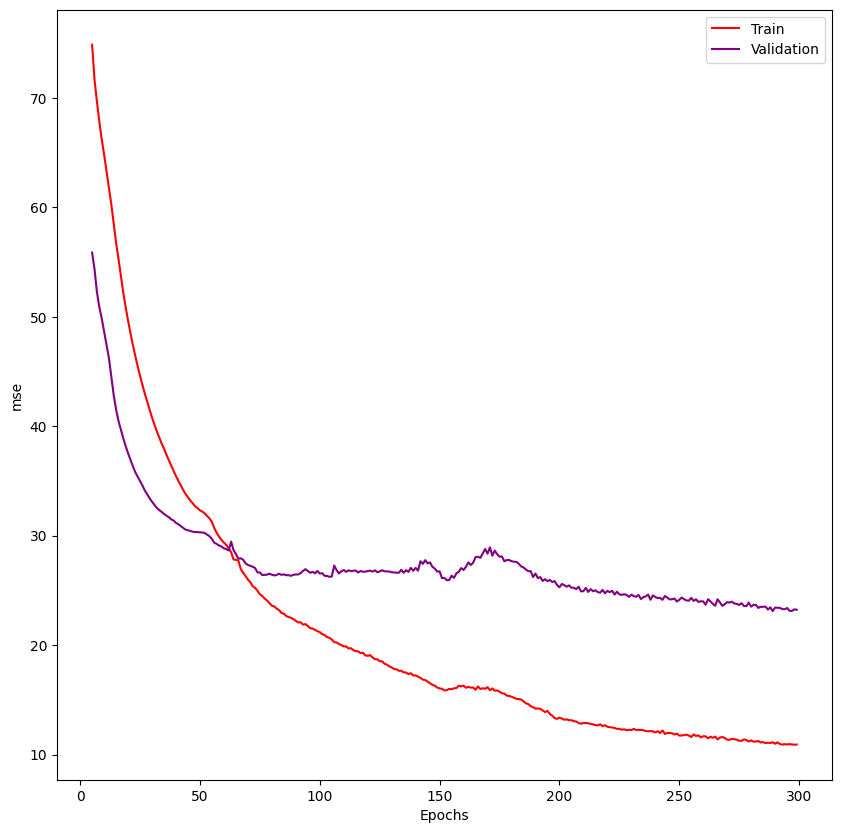

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(5,300), history.history['loss'][5:], label='Train', color='red') # epoch 5부터
plt.plot(range(5,300), history.history['val_loss'][5:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

1. 초기 구간 (0~50 epoch)
  * Train과 Validation 모두 급격히 감소함.
  * 모델이 데이터릐 기본 패턴을 잘 학습하고 있다는 뜻.
2. 중간 구간 (50~100 epoch)
  * Valiation MSE가 더 이상 감소하지 않고 평탄해짐.
  * 학습데이터 대한 성능은계석 좋아지는데 검증데이터에서는 개선이 멈춤.
  * 이 시점에서 일반화 성능이 최대인 지점.
3. 후반 구간 (100epoch 이후)
  * Train MSE는 계속 줄어들지만 Validation MSE는 오히려 약간 올라가거나 요동침.
  * 모델이 훈련 데이터의 세부적인 잡음까지 학습하면서 과적합 발생.

> Validation MSE가 더이상 좋아지지 않으므로 Early Stopping 기법 적용 가능

* 학습데이터를 이용한 모델 학습
  * 조기 중단 기법 사용

In [5]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_df.shape[1])) # 첫번째층 32개. input_dim=X_df.shape[1]==13
model.add(Dense(16, activation='relu')) # unit 개수 16개, Layer 2
model.add(Dense(8, activation='relu')) # unit 개수 8개, Layer 3
model.add(Dense(1, activation='linear')) # unit 개수 1개. Layer 4(출력층)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='mse')
es = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.25, callbacks=[es])

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 321.0903 - val_loss: 104.8709
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 97.8302 - val_loss: 82.4611
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 86.8623 - val_loss: 76.5557
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81.0933 - val_loss: 73.2569
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 78.5673 - val_loss: 66.4916
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 75.5642 - val_loss: 61.3716
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 73.6711 - val_loss: 58.3613
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 72.3533 - val_loss: 56.3633
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71.6107 - val_loss: 54.5095
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 70.7394 - val_loss: 52.9742
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 70.0042 - val_loss: 51.9446
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━

In [8]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.7641


17.165205001831055

* 시험데이터를 이용한 모델 평가
  * 학습데이터 MSE = 12.7
  * 검증데이터 MSE = 19.5
  * 시험데이터 MSE = 17.2

* 에폭별 비용함수(MSE) 값의 변화

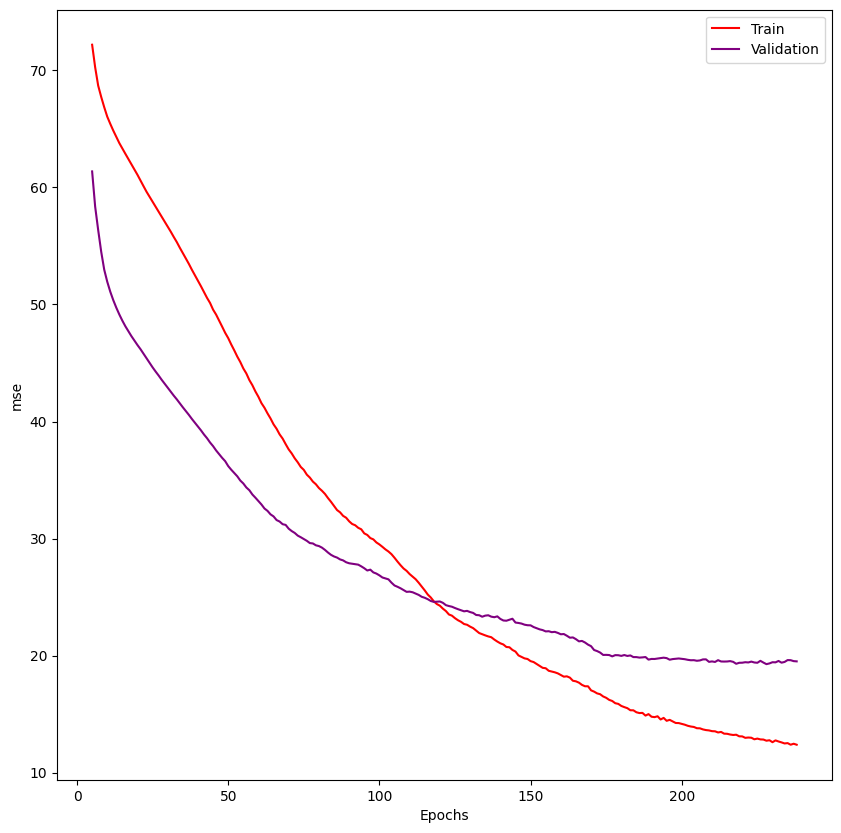

In [9]:
plt.figure(figsize=(10,10))
plt.plot(range(5,len(history.history['loss'])), history.history['loss'][5:], label='Train', color='red') # epoch 5부터
plt.plot(range(5,len(history.history['val_loss'])), history.history['val_loss'][5:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

* 검증데이터의 MSE 값이 180 epoch 부근에서 낮아진 이후로 뚜렷하게 감소하지 않고 수평을 유지하거나 약간 상승.
* 실제 학습은 239 epoch에서 종료됨.